### Import python library and packages 

In [52]:
import os
import math
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
import warnings
warnings.filterwarnings("ignore")

### Import the Dataset 

In [53]:
workout_calories = pd.read_excel("//kaggle//input//workout-calories//Workout_calories.xlsx")
workout_calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


**Data Description:** 

Workout_calories dataset contains data of `15,000` workout trainee.This data contains `User_Id,Gender,Height,Weight,Duration,Heart_Rate,Body_Temp` of the workout_trainees. From the data, we have to `predict Calories` of the workout trainees.

In [54]:
workout_calories.shape # Dimension

(15000, 9)

In [55]:
workout_calories.info()    # Data types  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [56]:
workout_calories.isnull().sum()     # Checking Missing value

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

`The workout_calories dataset has no missing value`

In [57]:
workout_calories.duplicated().sum()

0

`The workout_calories dataset ha no duplicate value`

In [58]:
workout_calories.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [59]:
workout_calories.describe(include='object')

,Gender
count,15000
unique,2
top,female
freq,7553


In [60]:
workout_calories = workout_calories.drop('User_ID',axis='columns')
workout_calories.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190,94,29,105,40.8,231
1,female,20,166,60,14,94,40.3,66
2,male,69,179,79,5,88,38.7,26
3,female,34,179,71,13,100,40.5,71
4,female,27,154,58,10,81,39.8,35


**The workout_calories dataset ,Calory is our output/target variable, now we have to find the best input/feature variables with visualization that will use to predict the Calories of workout_trainee**

In [61]:
input_data= workout_calories.drop('Calories',axis='columns')
input_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190,94,29,105,40.8
1,female,20,166,60,14,94,40.3
2,male,69,179,79,5,88,38.7
3,female,34,179,71,13,100,40.5
4,female,27,154,58,10,81,39.8


In [62]:
input_data.shape  # dimension of input variables

(15000, 7)

In [63]:
output_data= workout_calories.Calories
output_data.head()

0    231
1     66
2     26
3     71
4     35
Name: Calories, dtype: int64

In [64]:
output_data.shape   # dimension of output variables

(15000,)

### Visualization 

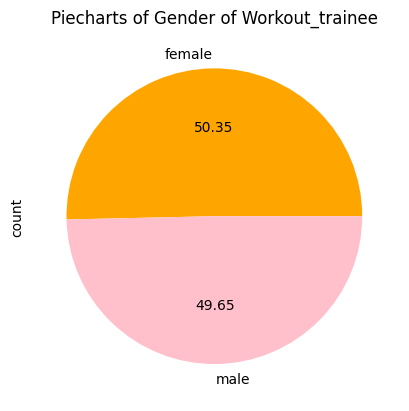

In [65]:
input_data.Gender.value_counts().plot(kind='pie',autopct='%.2f',colors=['orange','pink'])
plt.title('Piecharts of Gender of Workout_trainee')
plt.show()

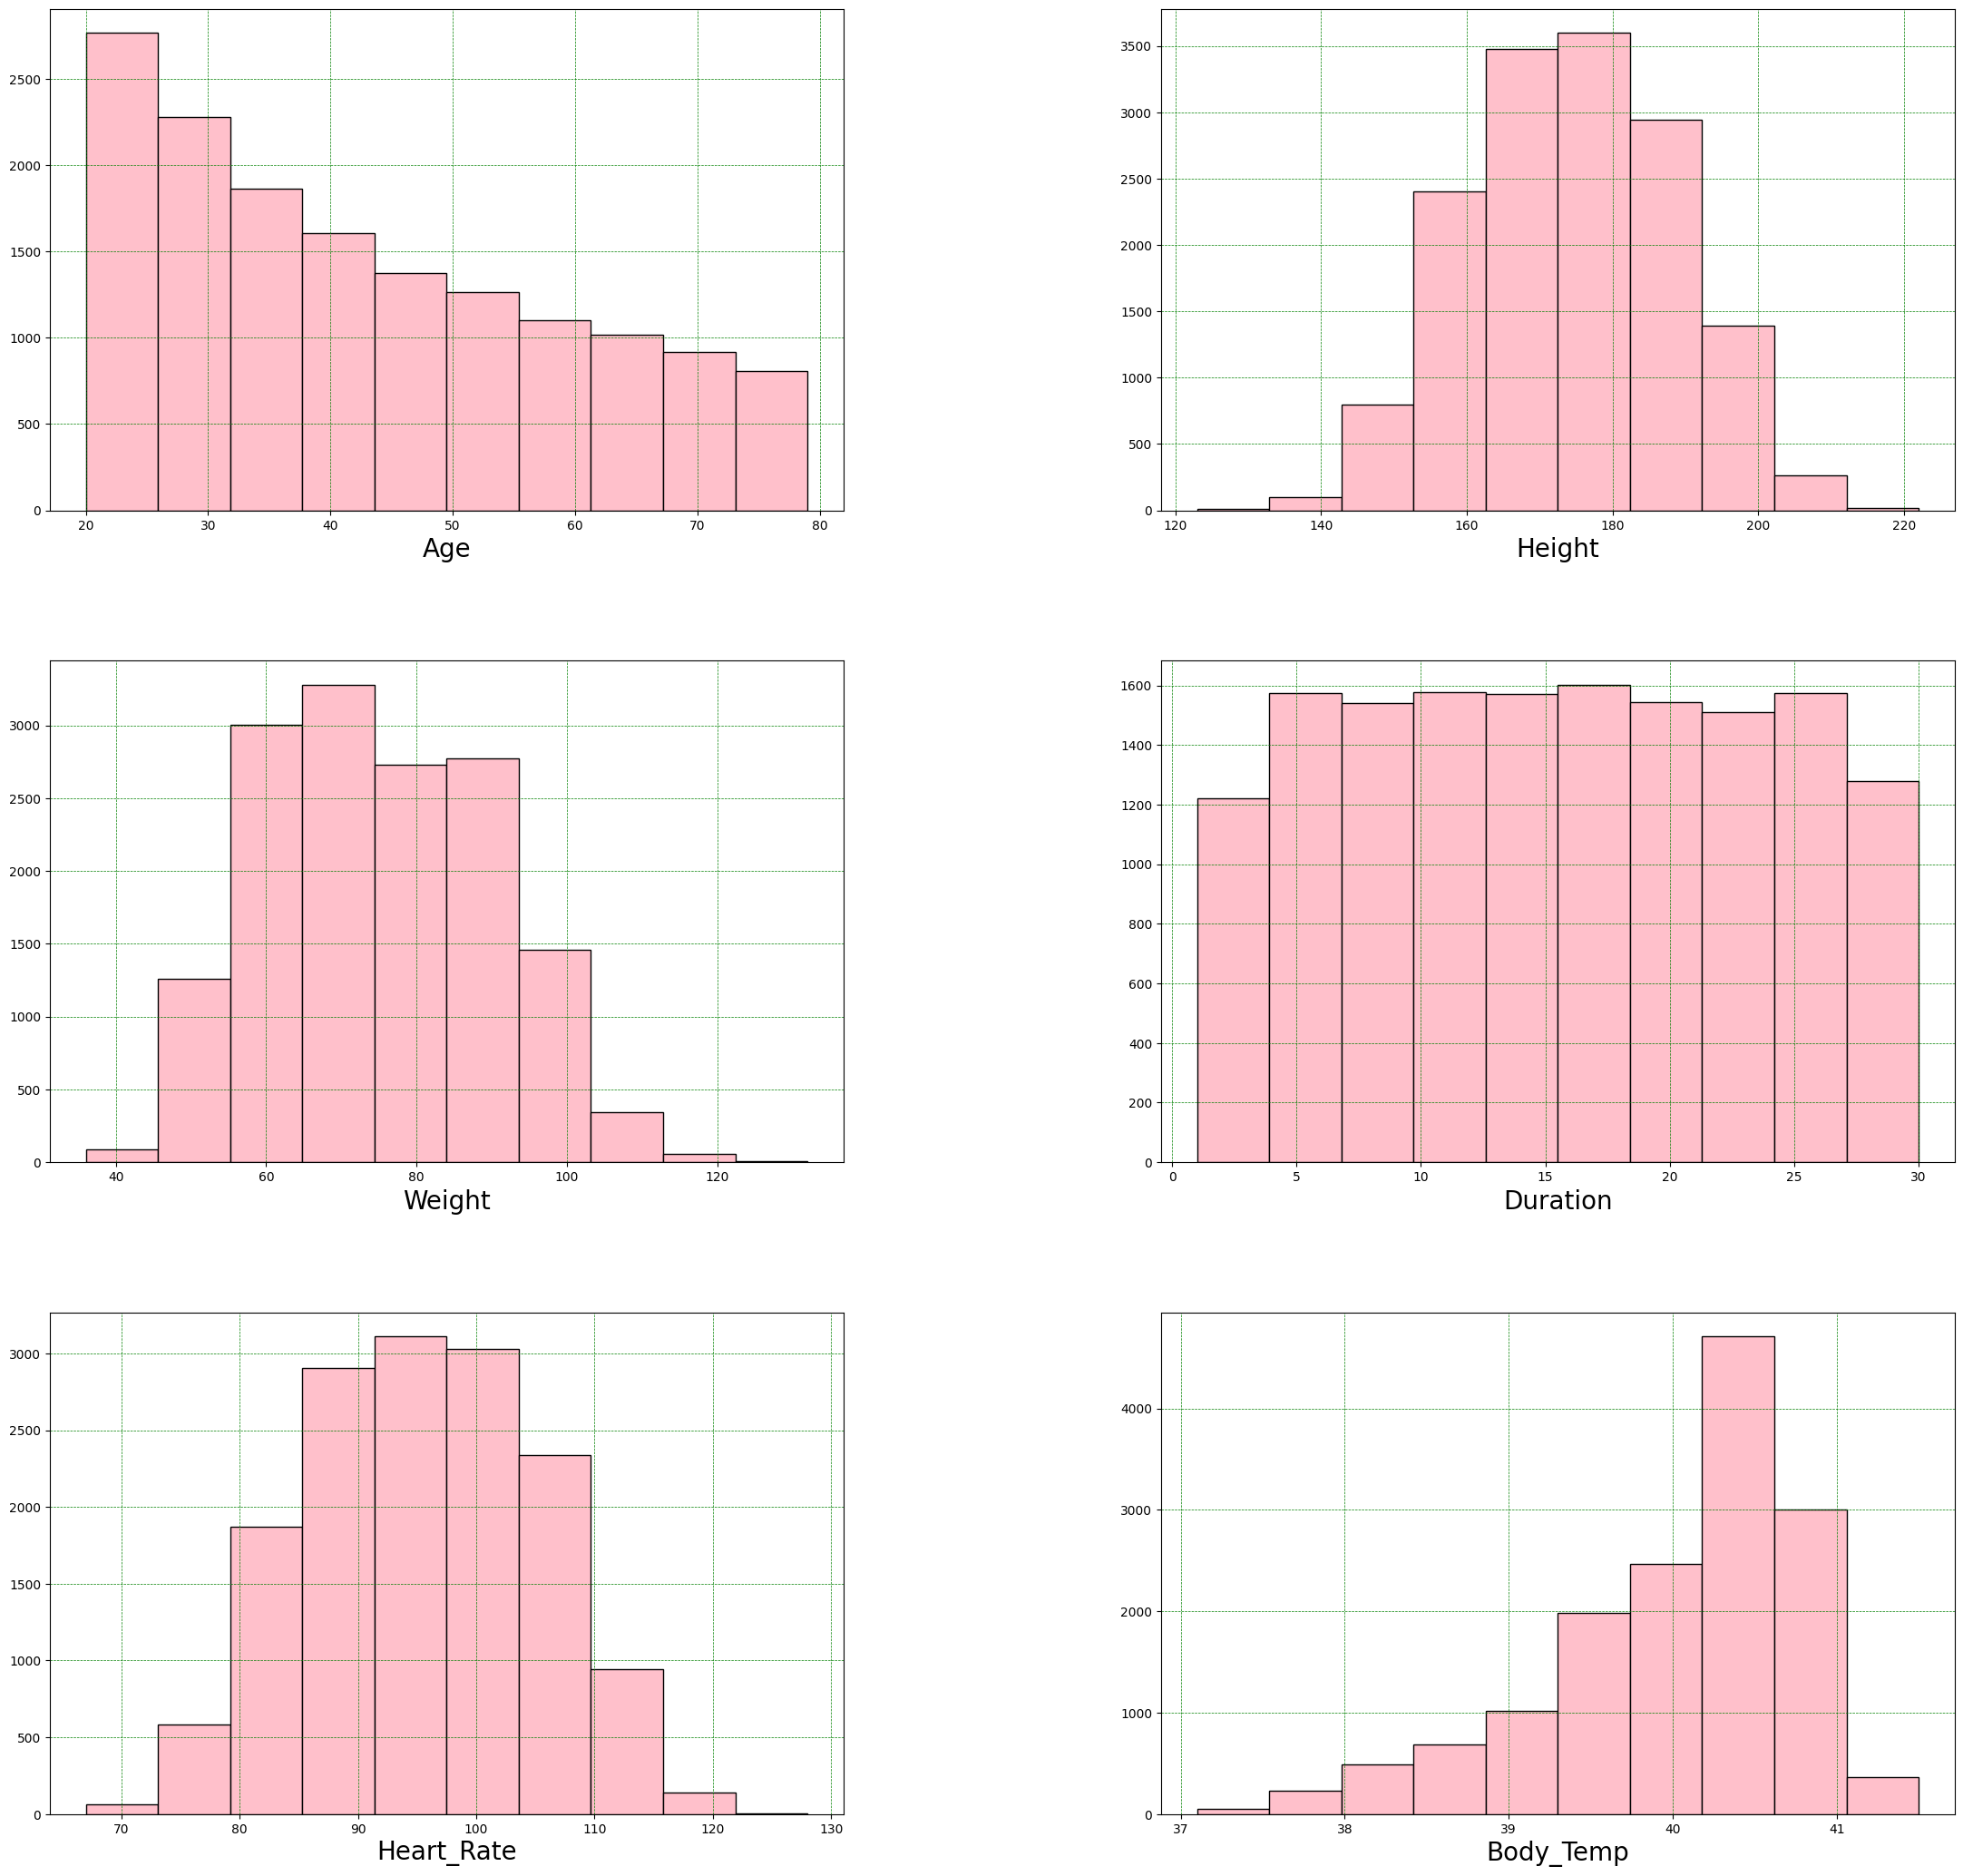

In [66]:
for i in range(input_data.drop('Gender',axis='columns').shape[1]):
    plt.subplot(3,2,i+1)
    input_data.drop('Gender',axis='columns').iloc[:,i].hist(figsize=(15,10),color='pink',edgecolor='black')
    plt.grid(color='green',linestyle = '--', linewidth = 0.5)
    plt.xlabel(input_data.drop('Gender',axis='columns').columns[i], fontsize=20)
plt.subplots_adjust(left=0.1,bottom=0.01, right=1.5, top=2, wspace=0.4, hspace=0.3)
plt.show()

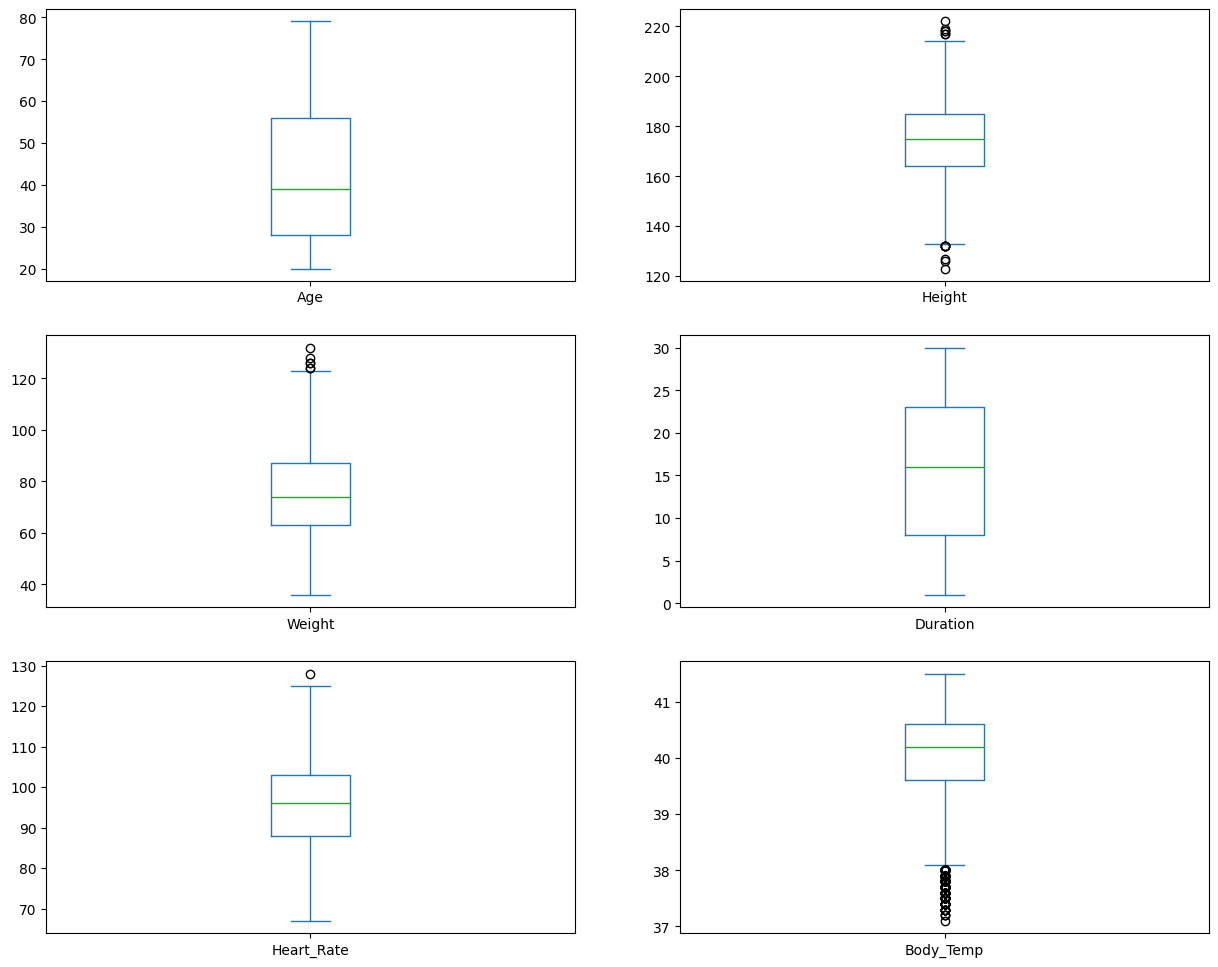

In [67]:
input_data.drop('Gender',axis='columns').plot(kind='box',subplots=True,layout=(3,2),figsize=(15,12))
plt.show()

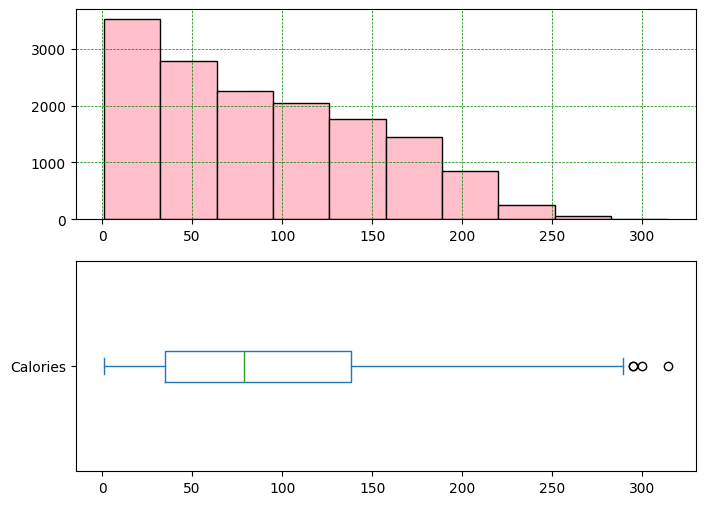

In [68]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
output_data.hist(color='pink',edgecolor='black')
plt.grid(color='green',linestyle = '--', linewidth = 0.5)
plt.subplot(2,1,2)
output_data.plot(kind='box',vert=False)
plt.show()

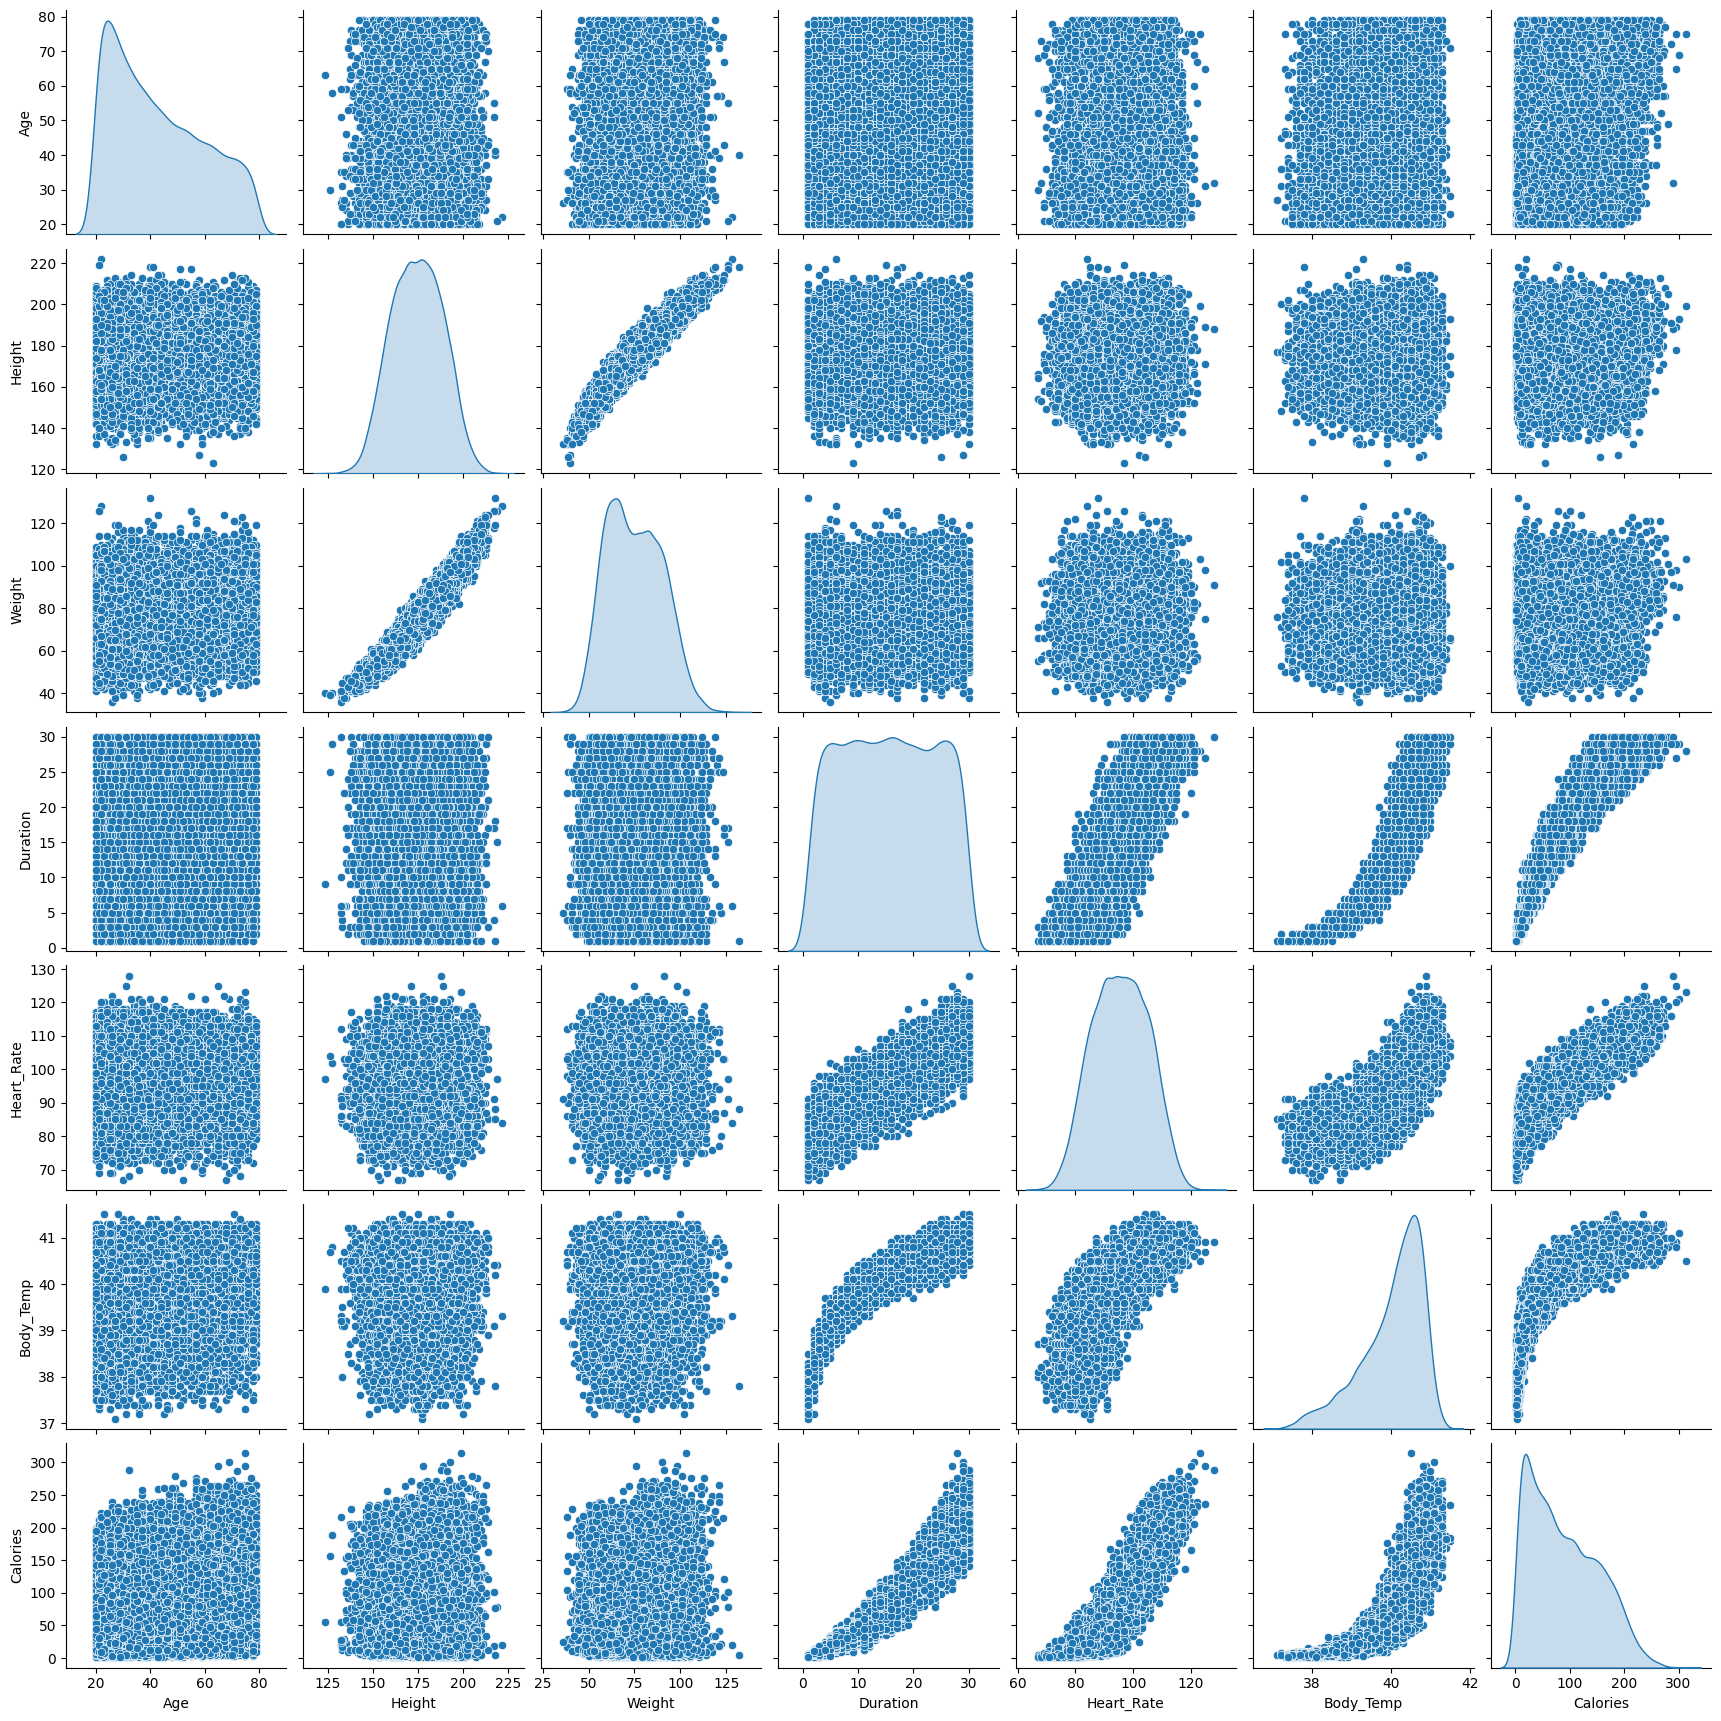

In [69]:
sns.pairplot(workout_calories,diag_kind='kde')
plt.show()

**Gender is a categorical data. So label encoding will be introduced to transfer it into numerical value**

In [70]:
le=LabelEncoder()
workout_calories.Gender=le.fit_transform(workout_calories.Gender)
workout_calories.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190,94,29,105,40.8,231
1,0,20,166,60,14,94,40.3,66
2,1,69,179,79,5,88,38.7,26
3,0,34,179,71,13,100,40.5,71
4,0,27,154,58,10,81,39.8,35


In [71]:
input_data.Gender=workout_calories.Gender
input_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190,94,29,105,40.8
1,0,20,166,60,14,94,40.3
2,1,69,179,79,5,88,38.7
3,0,34,179,71,13,100,40.5
4,0,27,154,58,10,81,39.8


In [72]:
workout_calories.corr()  #Correlation Matrix

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


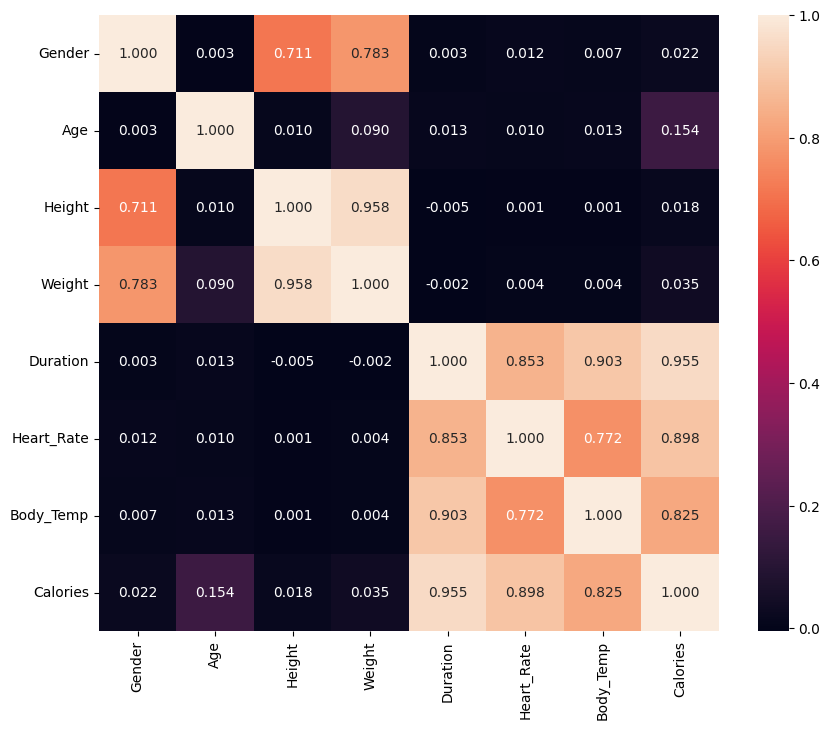

In [73]:
plt.figure(figsize=(10,8))
sns.heatmap(workout_calories.corr(),annot=True,fmt='.3f')
plt.show()

**Duration,Heart_Rate and Body_Temp are highly correlated with Calories (Output Variable)**

**Gender, Height, Weight and Age are less correlated with Calories (Output Variable)**

### Feature Selections 

`We are taking Linear Regression as the base model to do the Feature Selection`

**1. Taking all the input variables as feature**

In [74]:
np.mean(cross_val_score(LinearRegression(),input_data,output_data,cv=5))

0.967152984018283

**2. Removing the very least correlated (with output) input variable(Height)**

In [75]:
input_data_revised=input_data.drop(['Height'],axis='columns')
input_data_revised.head()

,Gender,Age,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,94,29,105,40.8
1,0,20,60,14,94,40.3
2,1,69,79,5,88,38.7
3,0,34,71,13,100,40.5
4,0,27,58,10,81,39.8


In [76]:
np.mean(cross_val_score(LinearRegression(),input_data_revised,output_data,cv=5))

0.96703290354894

In [78]:
# Accuracy reduction percentage
(np.mean(cross_val_score(LinearRegression(),input_data,output_data,cv=5))-np.mean(cross_val_score(LinearRegression(),input_data_revised,output_data,cv=5)))*100

0.012008046934297578

**As we remove the very less correlated variables the model score decreases by 0.012%. So we should not reduce the feature.
Our feature should contain all the input variables**

### Scaling 

`After selecting the feature, the feature should be scaled. We will use MinMaxscalar to scale the data, as it will give the values between o to 1 in the feature matrix. This should make ease in computation.`

In [31]:
input_data_scaled = pd.DataFrame(MinMaxScaler().fit_transform(input_data),columns=input_data.columns)
input_data_scaled.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1.0,0.813559,0.676768,0.604167,0.965517,0.622951,0.840909
1,0.0,0.000000,0.434343,0.250000,0.448276,0.442623,0.727273
2,1.0,0.830508,0.565657,0.447917,0.137931,0.344262,0.363636
3,0.0,0.237288,0.565657,0.364583,0.413793,0.540984,0.772727
4,0.0,0.118644,0.313131,0.229167,0.310345,0.229508,0.613636


### Model Selection 

In [32]:
model_params = {
    'RandomForest_Regressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [5,10,20,50,100],
        }
    },
    'DecisionTree_Regressor': {
        'model': DecisionTreeRegressor(),
        'params': {
           'min_samples_split':[2,5,10,20,50,100], 
            'max_depth':[5,10,20,50,100],
        }
    },
    'Linear_Regression':{
        'model':LinearRegression(),
        'params':{
             'n_jobs':[5,10,20,50,100],
        }
    },
    'SVR':{
        'model':SVR(),
        'params':{
            'C': [1,2,5,10,20],
        }
    }
}



In [33]:
# Perform GridSearchCV for each model
scores = []
for model_name, mp in model_params.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    reg.fit(input_data_scaled, output_data)
    scores.append({
        'model': model_name,
        'best_score': reg.best_score_,
        'best_params': reg.best_params_
    })

# Create a DataFrame to display the results
reg_model_score = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
reg_model_score

,model,best_score,best_params
0,RandomForest_Regressor,0.997945,{'n_estimators': 100}
1,DecisionTree_Regressor,0.993112,"{'max_depth': 100, 'min_samples_split': 5}"
2,Linear_Regression,0.967153,{'n_jobs': 5}
3,SVR,0.999847,{'C': 20}


**After performing Grid Search Cv on different base algorithms , the best algorithm for the regression model is : SupportVectorRegressor with parameter 
C = 20 and score is 99.98 %**

### Checking the fitting of regression model (With respect to best model)

In [46]:
# Using train_test_split method to split the data into training anfd testing data
X_train,X_test,y_train,y_test = train_test_split(input_data_scaled,output_data,test_size=0.2,random_state=4) # 20% test dataset

In [47]:
lin_reg = SVR(C=20)
lin_reg.fit(X_train,y_train)

SVR(C=20)

In [48]:
lin_reg.score(X_train,y_train)  # training score

0.9998629744520139

In [49]:
lin_reg.score(X_test,y_test) # testing score

0.9998271657537884

In [51]:
(lin_reg.score(X_train,y_train) - lin_reg.score(X_test,y_test))*100   # Difference betwwen training and testing score

0.0035808698225503477

**The difference between traing and testing accuracy is very small (less than 0.01%). So we can say the model is neither Overfitting nor Underfitting; i.e, the model is a 'Generalised model'.**

### Finding mean absolute error,mean square error, r2_score 

In [38]:
def reg_model_scores(model, input_data, output_data):
    # Define scoring metrics
    scoring = {'mse': 'neg_mean_squared_error',
               'mae': 'neg_mean_absolute_error',
               'r2': make_scorer(r2_score)}
    
    # Perform k-fold cross-validation
    mae_scores = cross_val_score(model, input_data, output_data, cv=5, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, input_data, output_data, cv=5, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, input_data, output_data, cv=5, scoring=make_scorer(r2_score))

    # Calculate average values
    avg_mae = -mae_scores.mean()
    avg_mse = -mse_scores.mean()
    avg_r2 = r2_scores.mean()
    
    return avg_mae, avg_mse, avg_r2



In [39]:
# Define the best models to evaluate
best_models = [LinearRegression(n_jobs=5),
               DecisionTreeRegressor(min_samples_split=5, max_depth=50),
               RandomForestRegressor(n_estimators=100),
              SVR(C=20)]

In [40]:
# Initialize a list to store model evaluation results
reg_model_error_score = []

# Evaluate each model and store the results
for model in best_models:
    mae, mse, r2 = reg_model_scores(model, input_data_scaled, output_data)
    reg_model_error_score.append({
        'model': model.__class__.__name__,
        'mean_absolute_error': mae,
        'mean_squared_error': mse,
        'r2_score': r2
    })

# Create a DataFrame to display the results
reg_model_error_score_df = pd.DataFrame(reg_model_error_score)
reg_model_error_score_df

,model,mean_absolute_error,mean_squared_error,r2_score
0,LinearRegression,8.355094,128.059448,0.967153
1,DecisionTreeRegressor,3.392644,26.885528,0.993022
2,RandomForestRegressor,1.754632,8.033925,0.997938
3,SVR,0.407143,0.595924,0.999847


**SupportVectorRegressor with parameter C = 20 has the least mean_absolute_error(MAE) and mean_square_error(MSE)**

**Interpretetion:**

1. Workout_calories Dataset has no **missing value** and **duplicate value**.

2. In the dataset `Height, Weight, Heart Rate, Body_Temp and Calories` has very **less outliers**. It can be ignored.

3. 'Duration (0.96),Heart_Rate (0.90) and Body_Temp (0.82)' are **highly correlated** with `Calories (Output Variable)`.

4. All the input variables are considered as the **feature** of the model.

5. The `best Regressor model` for the `calories prediction problem` is **SupportVectorRegressor with parameter C = 20(Score: 99.98%)**.

6. The best Regressor model `(SupportVectorRegressor with parameter C = 20)` has **least Mean Absolute Error (MAE : 0.407143) and Mean Square Error (MSE: 0.595924)**.

7. The best regressor model `(SupportVectorRegressor with parameter C = 20)` is neither Overfitting nor Underfitting; i.e, the model is a **Generalised model**. 